In [4]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Cargar el dataset (asegúrate de colocar la ruta correcta del archivo)
df = pd.read_csv('winequality-red.csv')
df




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

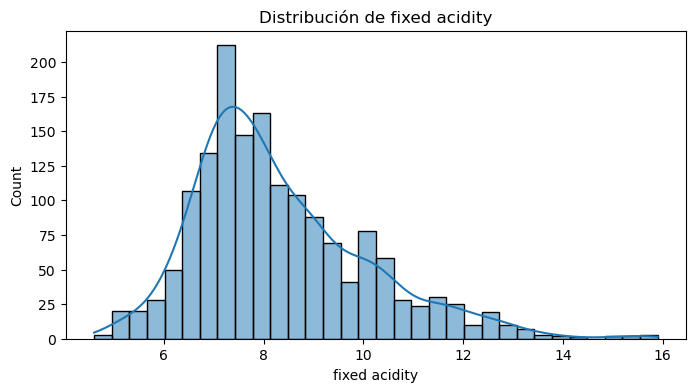

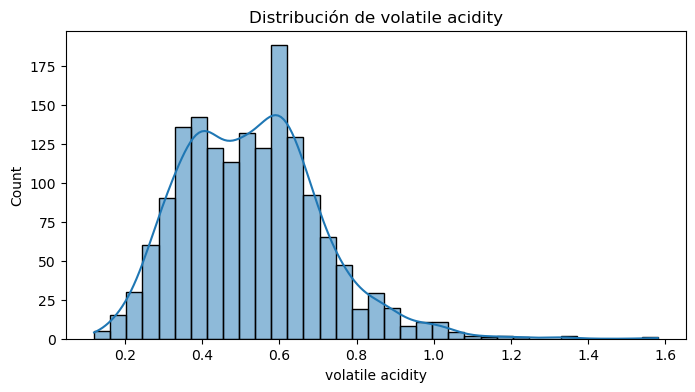

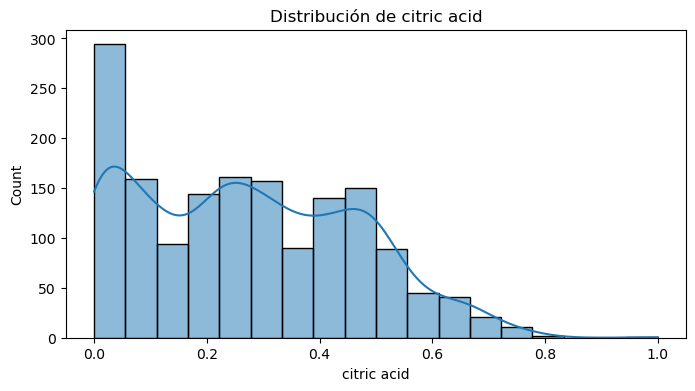

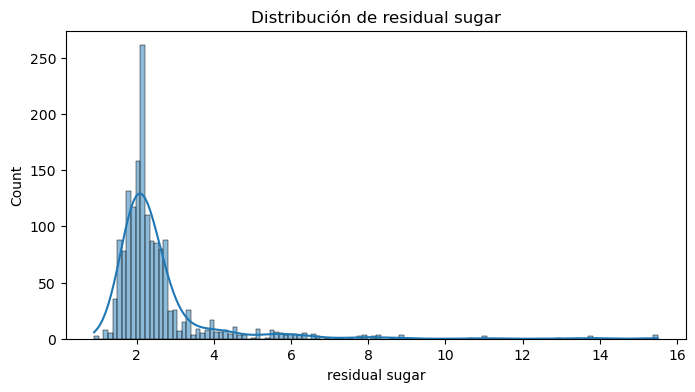

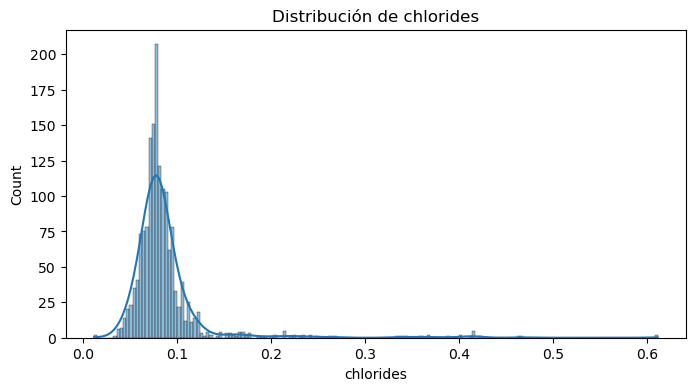

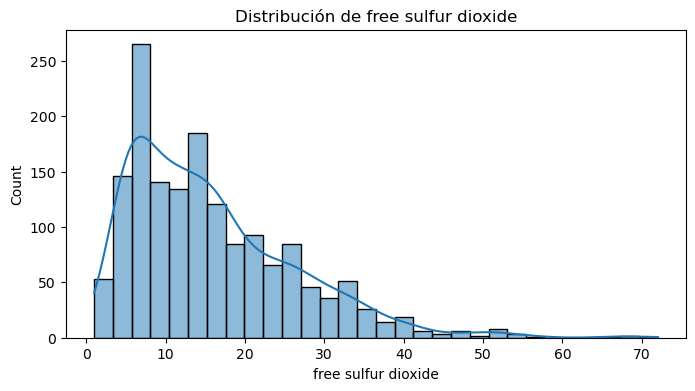

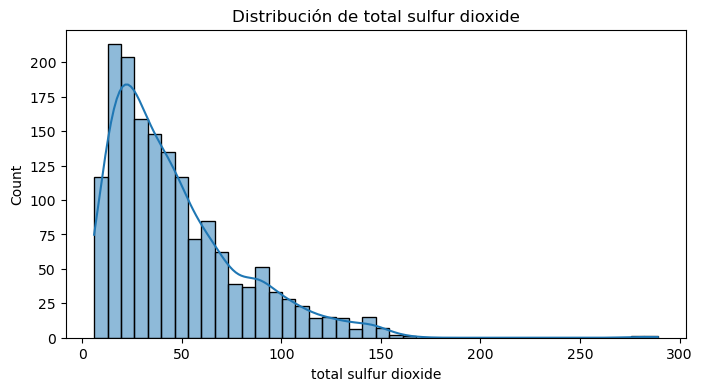

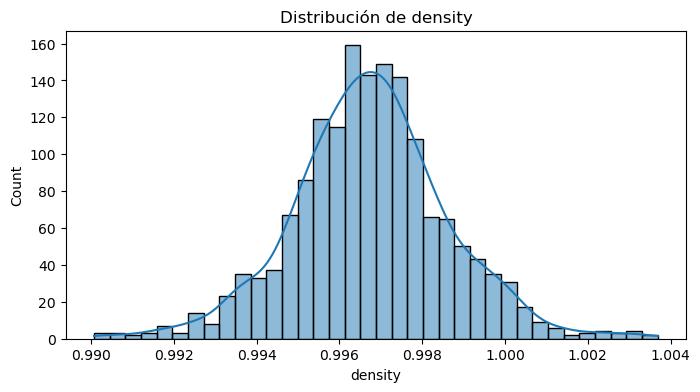

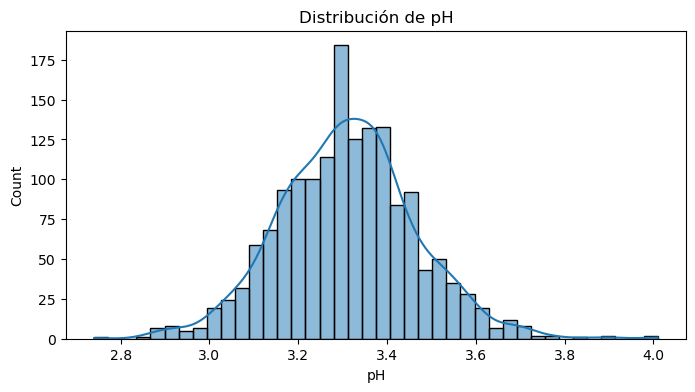

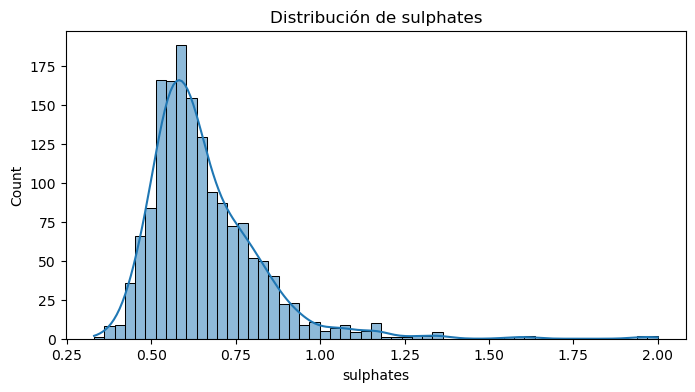

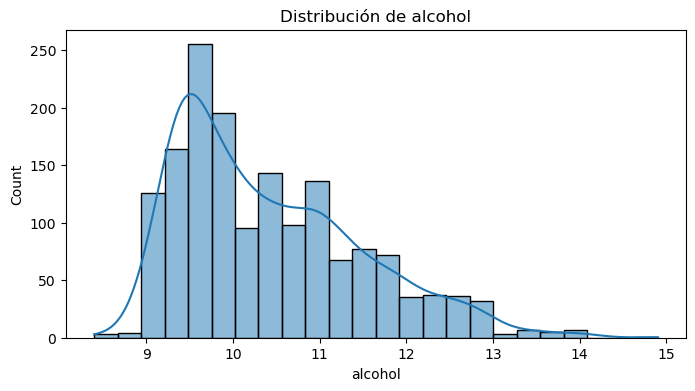

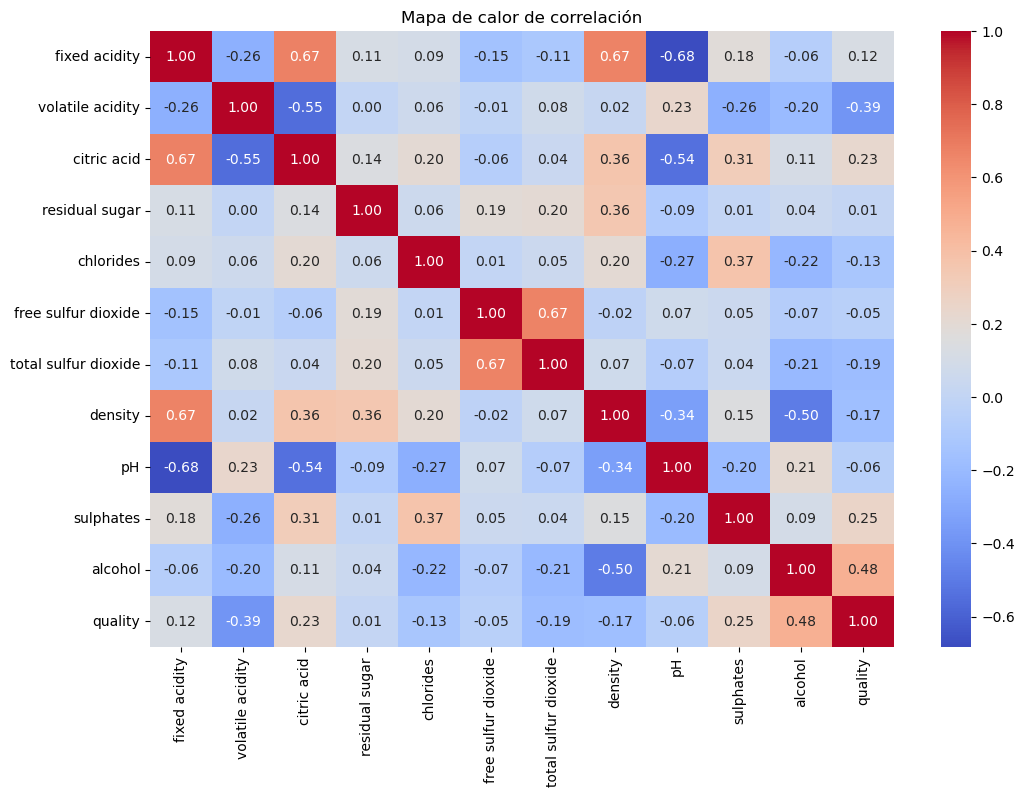

In [6]:
# Inspección inicial
print(df.head())
print(df.info())
print(df.describe())

# Visualización de distribuciones de algunas columnas importantes
for column in df.columns[:-1]:  # Excluimos la columna 'quality'
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Mapa de calor para correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlación')
plt.show()

In [8]:
# Identificar y manejar valores faltantes
print(df.isnull().sum())
df = df.dropna()  # Eliminamos filas con valores nulos, si existen

# Estandarización de variables numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.columns[:-1]  # Excluye la columna 'quality'
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

# Selección de características con RFE
X = df.drop('quality', axis=1)
y = df['quality']
model = DecisionTreeClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Selecciona 5 características más importantes
rfe.fit(X, y)

# Ver las características seleccionadas
selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features)
X = X[selected_features]


Características seleccionadas: Index(['volatile acidity', 'residual sugar', 'total sulfur dioxide',
       'sulphates', 'alcohol'],
      dtype='object')


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Configuración y entrenamiento del modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

Precisión: 0.55625
Recall: 0.55625
Precisión: 0.517940326722785
F1-score: 0.5317002079165195


C:\Users\Leandro Esteban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


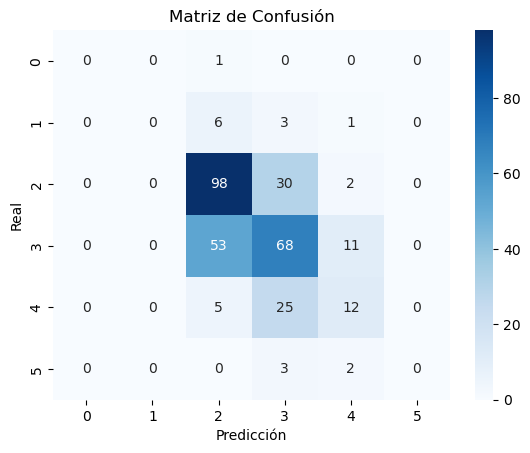

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones y evaluación
y_pred = model.predict(X_test)

# Métricas
print("Precisión:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precisión:", precision_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


C:\Users\Leandro Esteban\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


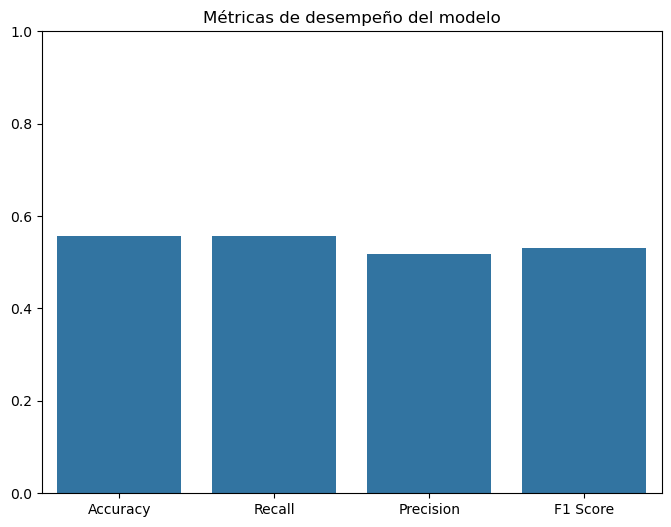

In [18]:
# Visualización de métricas
metrics = {'Accuracy': accuracy_score(y_test, y_pred),
           'Recall': recall_score(y_test, y_pred, average='weighted'),
           'Precision': precision_score(y_test, y_pred, average='weighted'),
           'F1 Score': f1_score(y_test, y_pred, average='weighted')}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1)
plt.title("Métricas de desempeño del modelo")
plt.show()


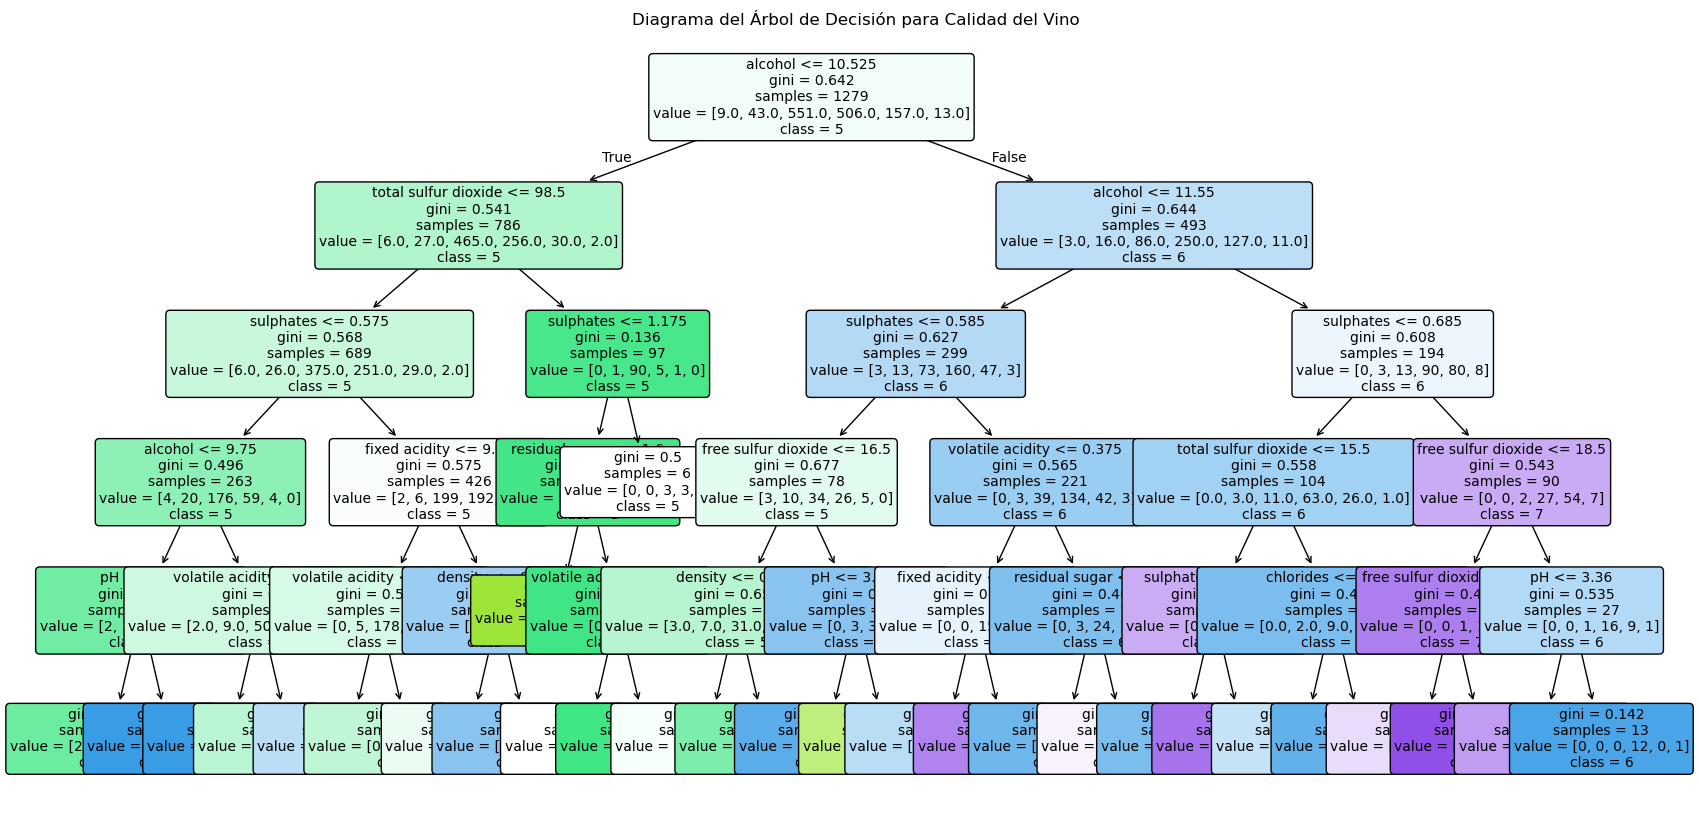

In [24]:
# Separar características y variable objetivo
X = df.drop('quality', axis=1)
y = df['quality']

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
model.fit(X_train, y_train)

# Visualización del Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], 
          filled=True, rounded=True, fontsize=10)
plt.title("Diagrama del Árbol de Decisión para Calidad del Vino")
plt.show()